In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import numpy as np
df = pd.read_csv('MS_Dhoni_ODI_record.csv')  # loading the dataset 

In [14]:
pd.set_option('display.max_columns', None)  # to display all columns when we print the dataframe
df.head(5)
df.tail(5)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187
349,50,50,72,69.44,1,1,v New Zealand,Manchester,09/07/2019,ODI # 4190


In [15]:
df['opposition'] = df['opposition'].str.replace('v ', '', regex=False)
df.head(5)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [16]:
df.drop(columns='odi_number',inplace=True)
df.head(5)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005


In [20]:
# Total Runs = sum of runs_scored
# Total Innings = count of innings played - (DNB + TDNB)
# Not Outs = score containing '*'
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)
df.head(5)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,0


In [24]:
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]
print(df.count())
print(df_new.count())

score          350
runs_scored    350
balls_faced    350
strike_rate    350
fours          350
sixes          350
opposition     350
ground         350
date           350
not_out        350
dtype: int64
runs_scored    297
balls_faced    297
strike_rate    297
fours          297
sixes          297
opposition     297
ground         297
date           297
not_out        297
dtype: int64


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 349
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   runs_scored  297 non-null    object
 1   balls_faced  297 non-null    object
 2   strike_rate  297 non-null    object
 3   fours        297 non-null    object
 4   sixes        297 non-null    object
 5   opposition   297 non-null    object
 6   ground       297 non-null    object
 7   date         297 non-null    object
 8   not_out      297 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 23.2+ KB


In [26]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 349
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runs_scored  297 non-null    int64  
 1   balls_faced  297 non-null    int64  
 2   strike_rate  297 non-null    float64
 3   fours        297 non-null    int64  
 4   sixes        297 non-null    int64  
 5   opposition   297 non-null    object 
 6   ground       297 non-null    object 
 7   date         297 non-null    object 
 8   not_out      297 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 23.2+ KB


In [29]:
df_new['date'] = df_new['date'].astype('datetime64[ns]')
first_match_date = df_new['date'].dt.date.min().strftime('%B %d, %Y')
print('First Match Date:', first_match_date)
last_match_date = df_new['date'].dt.date.max().strftime('%B %d, %Y')
print('Last Match Date:', last_match_date)

First Match Date: December 23, 2004
Last Match Date: December 01, 2019


In [30]:
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-02-04,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-05-04,0


In [ ]:
print('No. of Matches played: ', df.shape[0])
print('No. of Innings played: ', df_new.shape[0])
print('No. of Not Outs:', df_new['not_out'].sum())
print('Total Runs Scored: ', df_new['runs_scored'].sum())
print('Balls faced in career: ', df_new['balls_faced'].sum())
print('Career Strike rate: ', round(df_new['runs_scored'].sum()*100/df_new['balls_faced'].sum(),2))
print('Career Average: ', round(df_new['runs_scored'].sum()/(df_new.shape[0]-df_new['not_out'].sum()), 2))
print("No. of hunderds: ", )

No. of Matches played:  350
No. of Innings played:  297
No. of Not Outs: 84
Total Runs Scored:  10773
Balls faced in career:  12303
Career Strike rate:  87.56
Career Average:  50.58


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Afghanistan      2
Ireland          2
Scotland         1
Bermuda          1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


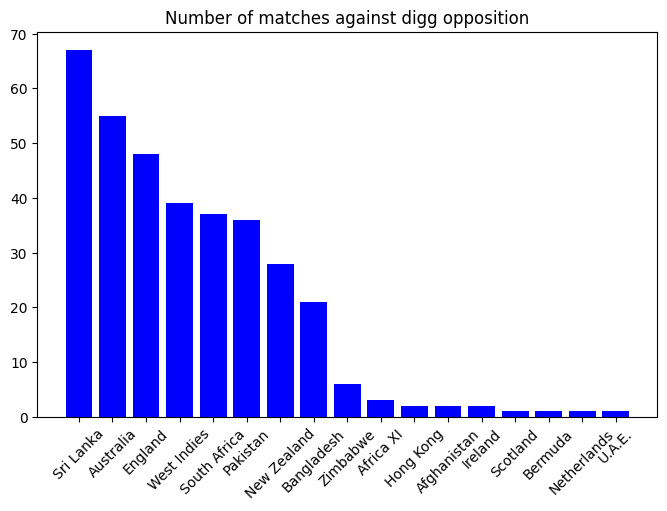

In [39]:
# matches against diffn oppositions 

opposition_counts = df['opposition'].value_counts()
print(opposition_counts)
print(type(opposition_counts))

# Matplotlib bar plot
plt.figure(figsize=(8,5))
plt.bar(opposition_counts.index,opposition_counts.values,color="blue")
plt.title("Number of matches against digg opposition")
plt.xticks(rotation=45)
plt.show()

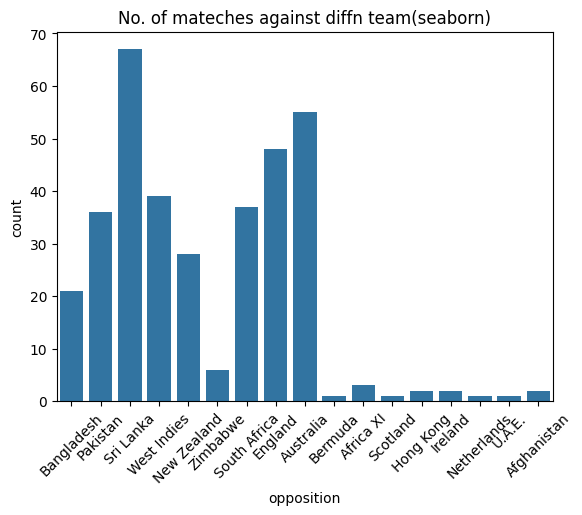

In [44]:
# seaborn version

sns.countplot(x=df['opposition']) #or sns.countplot(x = 'opposition',data=df)
plt.title("No. of mateches against diffn team(seaborn)")
plt.xticks(rotation=45)
plt.show()

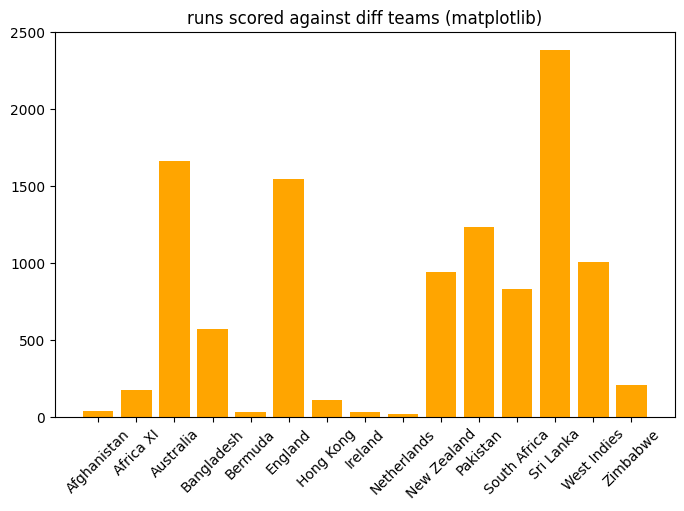

In [51]:
# Runs scored against each team

runs_scored_by_opposition = df_new.groupby('opposition')['runs_scored'].sum().reset_index()
# matplotlib

plt.figure(figsize=(8,5))
plt.bar(runs_scored_by_opposition['opposition'],runs_scored_by_opposition['runs_scored'],color='orange')
plt.title('runs scored against diff teams (matplotlib)')
plt.xticks(rotation=45)
plt.show()



In [ ]:
runs_scored_by_opposition = df_new.groupby('opposition')['runs_scored'].sum()
print(runs_scored_by_opposition)
print(type(runs_scored_by_opposition))

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int64
<class 'pandas.core.series.Series'>


In [56]:
runs_scored_by_opposition = df_new.groupby('opposition')['runs_scored'].sum().reset_index()
print(runs_scored_by_opposition)
print(type(runs_scored_by_opposition))

      opposition  runs_scored
0    Afghanistan           36
1      Africa XI          174
2      Australia         1660
3     Bangladesh          569
4        Bermuda           29
5        England         1546
6      Hong Kong          109
7        Ireland           34
8    Netherlands           19
9    New Zealand          940
10      Pakistan         1231
11  South Africa          830
12     Sri Lanka         2383
13   West Indies         1005
14      Zimbabwe          208
<class 'pandas.core.frame.DataFrame'>


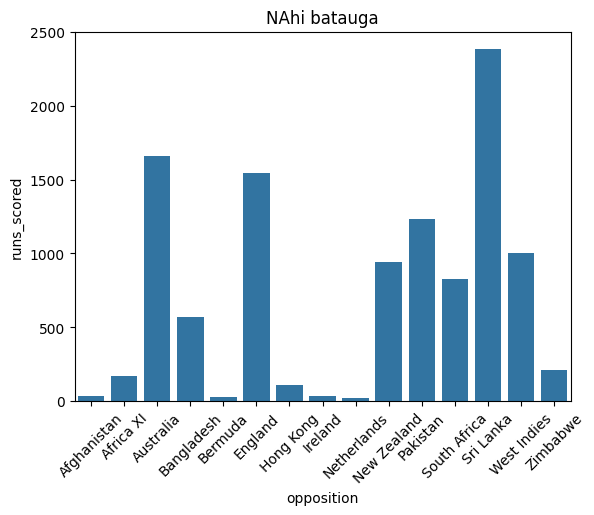

In [58]:
# seaborn using

sns.barplot(x = 'opposition', y = 'runs_scored',data=runs_scored_by_opposition)
plt.title("NAhi batauga")
plt.xticks(rotation=45)
plt.show()

In [59]:
runs_scored_by_opposition = df_new.groupby('opposition')
print(type(runs_scored_by_opposition))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
